
# Analysis of Greenhouse Gas (GHG) Inventory Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Greenhouse Gas (GHG) Inventory Data contains the most recently submitted information, covering the period from 1990 to the latest available year, to the extent the data have been provided. The GHG data contain information on anthropogenic emissions by sources and removals by sinks of the six principal GHGs (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulphur hexafluoride (SF6)) that are not controlled by the Montreal Protocol.

GHG emission inventories are developed by Parties to the Convention using scientific and methodological guidance from the Intergovernmental Panel on Climate Change (IPCC), such as Revised Guidelines for National Greenhouse Gas Inventories (1996), IPCC Good Practice Guidance and Uncertainty Management in National Greenhouse Gas Inventories (2000) and IPCC Good Practice Guidance on Land Use, Land-use Change and Forestry (2003).

Last update in UNdata: 8 Jan 2015 with data released in Nov 2014
Next update in UNdata: Nov 2015



PUBLISHER
IBM Cloud Data Services
SOURCE
http://data.un.org/Explorer.aspx
TERMS OF USE
http://data.un.org/Host.aspx?Content=UNdataUse


### Question(s) for Analysis
* Has the level of greenhouse gases emitted in Sweden decreased or increased over the the stipulated period in this dataset?
* Major components of the greenhouse gases emitted in Sweden?
* Years of highest and lowest emission of greenhouse gases in Sweden.

### Data wrangling

In [1]:
#loading the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the csv file
emissions = pd.read_csv('greenhouse.csv')

In [3]:
#information about the dataset
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or Area    989 non-null    object 
 1   Year               989 non-null    int64  
 2   co2_gigagrams      989 non-null    float64
 3   hfc_gigagrams      879 non-null    float64
 4   methane_gigagrams  989 non-null    float64
 5   pfc_gigagrams      763 non-null    float64
 6   sf6_gigagrams      919 non-null    float64
 7   n2o_gigagrams      966 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 61.9+ KB


In [4]:
emissions.shape

(989, 8)

In [5]:
#showing first 5 rows of the dataset
emissions.head()

,Country or Area,Year,co2_gigagrams,hfc_gigagrams,methane_gigagrams,pfc_gigagrams,sf6_gigagrams,n2o_gigagrams
0,Australia,2012,397830.6047,7945.106379,111709.4988,253.697462,134.111252,25775.42951
1,Australia,2011,398161.3872,7512.150105,110274.7423,259.250564,134.136620,25201.09362
2,Australia,2010,399364.8191,6942.606891,109062.6389,243.764011,145.185945,24451.85748
3,Australia,2009,398668.7713,6353.309697,110806.5324,307.886656,143.230925,24897.90320
4,Australia,2008,399084.1509,5810.538264,113592.7600,381.135610,158.400094,25546.77744


In [6]:
#renaming the columns['Country or Area'] to ['country'] and ['Year'] to ['year'] 
emissions = emissions.rename(columns={'Country or Area': 'country', 'Year': 'year'})

In [7]:
emissions.head()

,country,year,co2_gigagrams,hfc_gigagrams,methane_gigagrams,pfc_gigagrams,sf6_gigagrams,n2o_gigagrams
0,Australia,2012,397830.6047,7945.106379,111709.4988,253.697462,134.111252,25775.42951
1,Australia,2011,398161.3872,7512.150105,110274.7423,259.250564,134.136620,25201.09362
2,Australia,2010,399364.8191,6942.606891,109062.6389,243.764011,145.185945,24451.85748
3,Australia,2009,398668.7713,6353.309697,110806.5324,307.886656,143.230925,24897.90320
4,Australia,2008,399084.1509,5810.538264,113592.7600,381.135610,158.400094,25546.77744


In [8]:
#removing _gigagrams from the columns names
names = []
for column in emissions.columns:
    if '_gigagrams' in column:
        names.append(column[ : -10])
    else:
        names.append(column)

emissions.columns = names

In [9]:
emissions.columns

Index(['country', 'year', 'co2', 'hfc', 'methane', 'pfc', 'sf6', 'n2o'], dtype='object')

### Data cleaning

In [10]:
#checking for NaN/missing values
emissions.isna().any()

country    False
year       False
co2        False
hfc         True
methane    False
pfc         True
sf6         True
n2o         True
dtype: bool

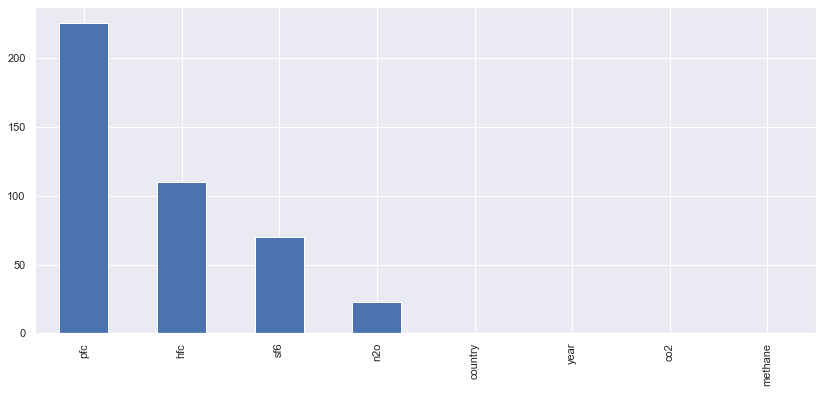

In [11]:
#visualizing the missing values
emissions.isna().sum().sort_values(ascending=False).plot.bar(figsize=(14,6));

#### Lots of values are missing in the pfc, hfc, sf6 and n20 columns respectively. In order to ensure a non-biased analysis, rows with the missing values will be dropped from the dataset.

In [12]:
#dropping NaNs
emissions.dropna(inplace=True)

In [13]:
#checking for NaNs
emissions.isna().sum()

country    0
year       0
co2        0
hfc        0
methane    0
pfc        0
sf6        0
n2o        0
dtype: int64

### Data exploratory analysis

In [14]:
#creating another column know as total which is an aggregate of the greenhouses gases
emissions['total'] = emissions[['co2','hfc','methane','pfc','sf6','n2o']].sum(axis=1)
emissions.head()

,country,year,co2,hfc,methane,pfc,sf6,n2o,total
0,Australia,2012,397830.6047,7945.106379,111709.4988,253.697462,134.111252,25775.42951,543648.448102
1,Australia,2011,398161.3872,7512.150105,110274.7423,259.250564,134.136620,25201.09362,541542.760409
2,Australia,2010,399364.8191,6942.606891,109062.6389,243.764011,145.185945,24451.85748,540210.872327
3,Australia,2009,398668.7713,6353.309697,110806.5324,307.886656,143.230925,24897.90320,541177.634178
4,Australia,2008,399084.1509,5810.538264,113592.7600,381.135610,158.400094,25546.77744,544573.762308


In [15]:
#summary statistics
emissions[['co2','hfc','methane','pfc','sf6','n2o']].describe().T.drop('count', axis=1) \
.style.highlight_max(color='red')

,mean,std,min,25%,50%,75%,max
co2,392811.934894,782151.013826,85.401921,44310.181945,100659.380300,397995.995950,4437028.493000
hfc,4816.480294,10727.409219,0.017700,178.577606,850.892186,4984.386962,85898.389850
methane,56817.013019,117153.599659,0.760480,5269.556753,13152.649770,51759.445255,601172.634500
pfc,1314.504668,2792.254727,0.000039,28.625614,168.339900,1332.378999,21249.989990
sf6,1073.332493,2690.438171,0.000239,17.176553,117.001965,666.149797,17535.349590
n2o,34737.110706,76693.595472,2.888026,5413.911476,9292.567584,29931.774050,527804.271100


Co2 has the highest statistics among the pollutants recorded in the dataset

In [16]:
#summary statistics
emissions[['co2','hfc','methane','pfc','sf6','n2o']].describe().T.drop('count', axis=1) \
.style.highlight_min(color='green')

,mean,std,min,25%,50%,75%,max
co2,392811.934894,782151.013826,85.401921,44310.181945,100659.380300,397995.995950,4437028.493000
hfc,4816.480294,10727.409219,0.017700,178.577606,850.892186,4984.386962,85898.389850
methane,56817.013019,117153.599659,0.760480,5269.556753,13152.649770,51759.445255,601172.634500
pfc,1314.504668,2792.254727,0.000039,28.625614,168.339900,1332.378999,21249.989990
sf6,1073.332493,2690.438171,0.000239,17.176553,117.001965,666.149797,17535.349590
n2o,34737.110706,76693.595472,2.888026,5413.911476,9292.567584,29931.774050,527804.271100


**sf6** has the lowest value for **mean, standard deviation, 25 percentile, median(50 percentile), 75% percentile and maximum values** while **pfc** has the lowest value for minimum in the dataset.

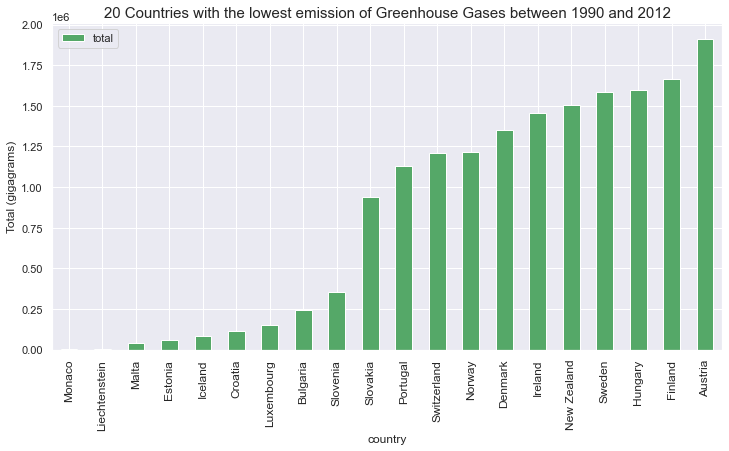

In [17]:
#20 countries with the lowest emissions of greenhouses gases in the dataset
emissions_country_total = emissions.groupby(['country'])[['total']].sum()
emissions_lowest_20 = emissions_country_total.nsmallest(20, 'total')
emissions_lowest_20.plot.bar(color='g', figsize=(12,6))
plt.ylabel('Total (gigagrams)')
plt.title('20 Countries with the lowest emission of Greenhouse Gases between 1990 and 2012', fontsize=15)
plt.xticks(fontsize=12);

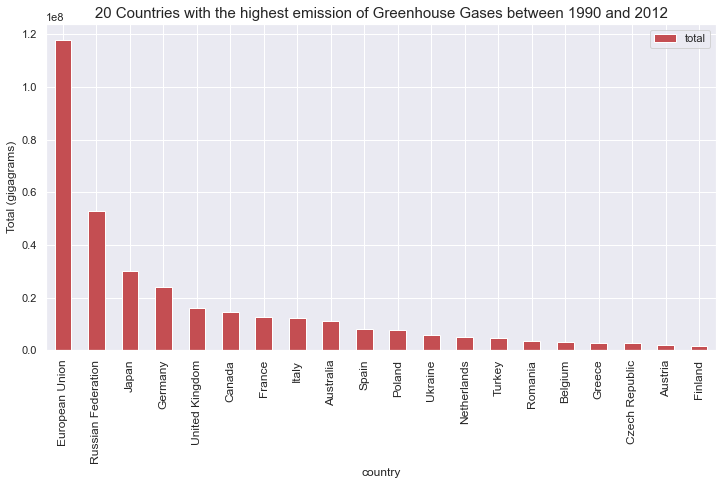

In [18]:
#20 countries with the highest emissions of greenhouse gases in the dateset
emissions_highest_20 = emissions_country_total.nlargest(20, 'total')
emissions_highest_20.plot.bar(color='r', figsize=(12,6))
plt.ylabel('Total (gigagrams)')
plt.title('20 Countries with the highest emission of Greenhouse Gases between 1990 and 2012', fontsize=15)
plt.xticks(fontsize=12);

### Focusing on Sweden for further analysis.
#### Sweden is one of the top 20 countries with the lowest emission of greenhouse gases in the period of years dataset provided.

In [19]:
#filtering for sweden
emission_sweden = emissions.query('country == "Sweden"')
emission_sweden.head()

,country,year,co2,hfc,methane,pfc,sf6,n2o,total
851,Sweden,2012,45713.25184,774.542627,4807.239425,68.919909,55.087781,6191.406682,57610.448264
852,Sweden,2011,48482.51608,820.095664,4944.187198,183.430126,60.248157,6270.552173,60761.029398
853,Sweden,2010,52283.35983,848.435206,5047.129051,158.342109,72.399043,6669.822790,65079.488030
854,Sweden,2009,46519.84195,869.912453,5146.516598,35.333435,80.913743,6450.962646,59103.480824
855,Sweden,2008,49980.29270,868.360878,5249.778938,225.051630,83.868741,6611.950143,63019.303030


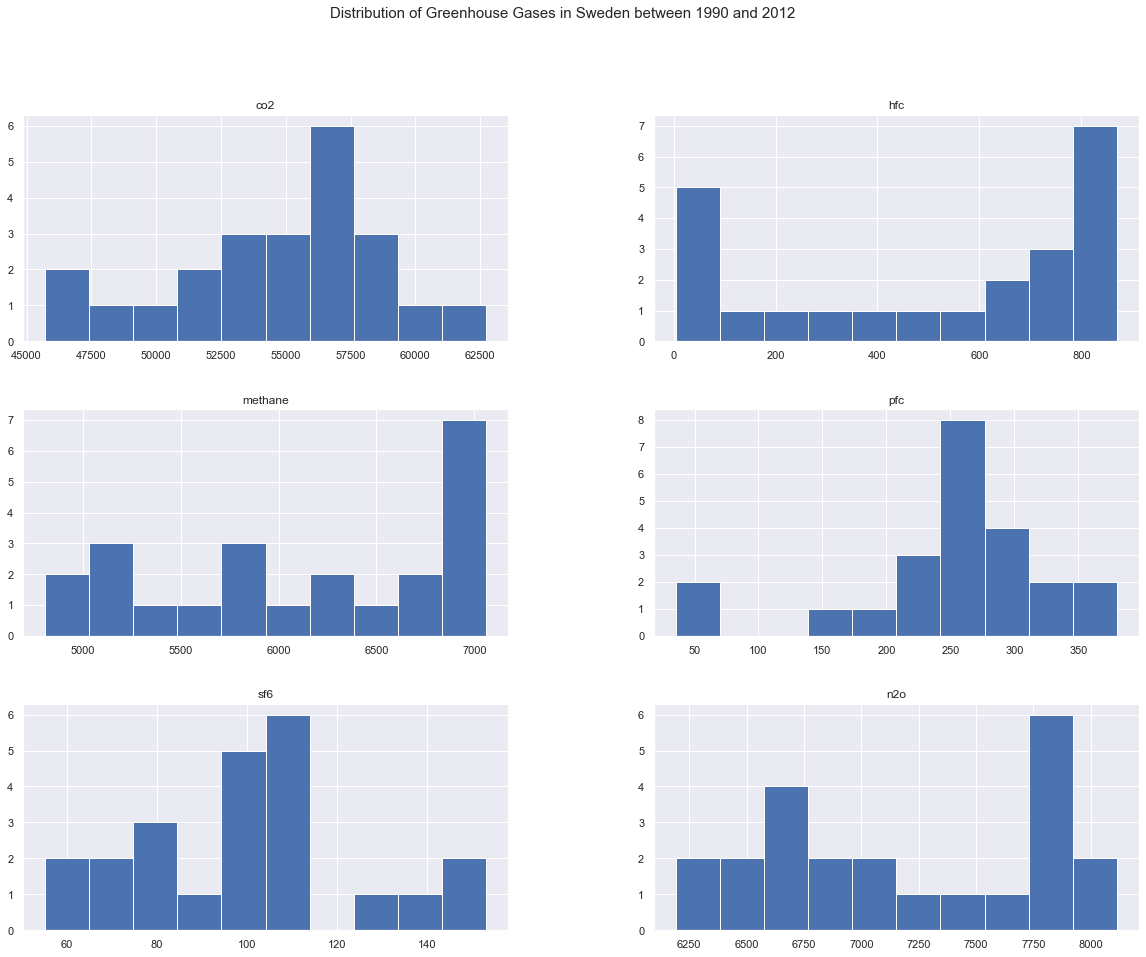

In [169]:
#distribution of the greenhouse gases in Sweden between 1990 and 2012
gases = ['co2','hfc','methane','pfc','sf6','n2o']
emission_sweden[gases].hist(figsize=[20,15])
plt.suptitle('Distribution of Greenhouse Gases in Sweden between 1990 and 2012', fontsize=15);

* CO2 has a right-skewed distribution. Most of the data points are concentrated on the right with a unimodal shape.
* HFC is skewed-right with more occurence of emission of 800 gigagrams and more.
* Methane has a similiar shape distribution to HFC with more counts of 7000 gigagrams.
* PFC appears to have a normal distribution with an outlier appearing on the left of the curve.
* SF6 has a unimodal curve with its data point fairly distributed across.
* N2O had a near to uniform distribution with an emission between 7750 and 8000 gigagrams showing high occurrence.

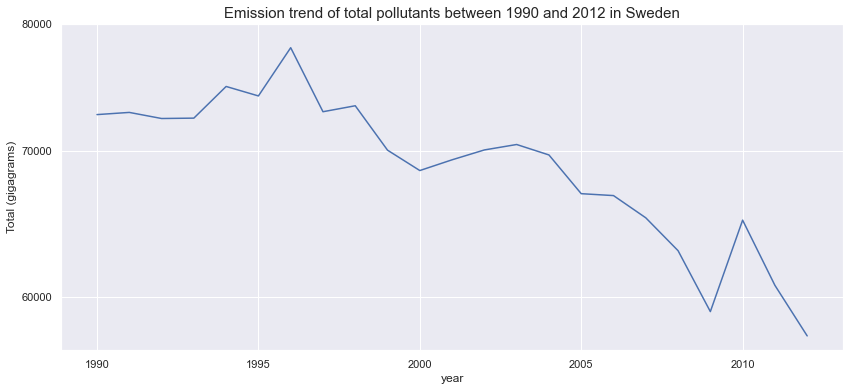

In [96]:
#plotting a line chart for the emission of the total greenhouse gases against time
plt.figure(figsize=(14,6))
plt.plot(emission_sweden['year'], emission_sweden['total'])
plt.title('Emission trend of total pollutants between 1990 and 2012 in Sweden', fontsize=15)
plt.ylabel('Total (gigagrams)')
plt.xlabel('year')
plt.yscale('log')
plt.yticks([6e4, 7e4, 8e4], [60000,70000,80000])
plt.show()

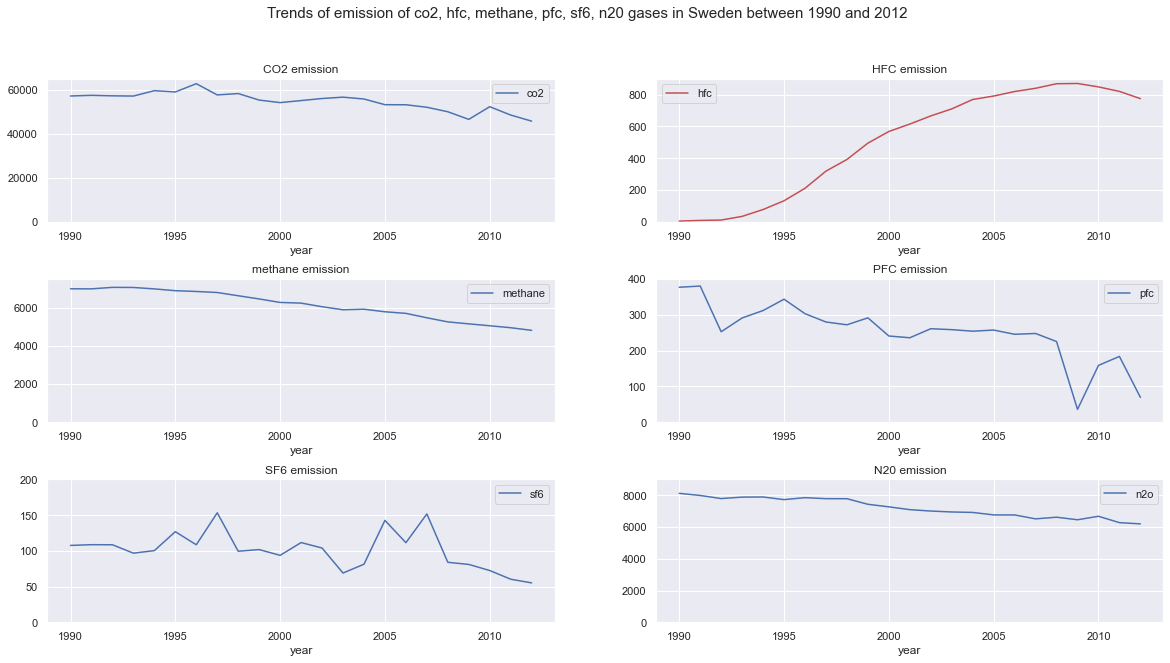

In [94]:
fig, axes = plt.subplots(3, 2, figsize=(20,10))
emission_sweden.plot(kind='line', x='year', y='co2', ax=axes[0][0]).set_ylim((0,65000))
axes[0][0].set_title('CO2 emission')
emission_sweden.plot(kind='line', x='year', y='hfc', ax=axes[0][1], color='r').set_ylim((0,900))
axes[0][1].set_title('HFC emission')
emission_sweden.plot(kind='line', x='year', y='methane', ax=axes[1][0]).set_ylim((0,7500))
axes[1][0].set_title('methane emission')
emission_sweden.plot(kind='line', x='year', y='pfc', ax=axes[1][1]).set_ylim((0,400))
axes[1][1].set_title('PFC emission')
emission_sweden.plot(kind='line', x='year', y='sf6', ax=axes[2][0]).set_ylim((0,200))
axes[2][0].set_title('SF6 emission')
emission_sweden.plot(kind='line', x='year', y='n2o', ax=axes[2][1]).set_ylim((0,9000))
axes[2][1].set_title('N20 emission')
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Trends of emission of co2, hfc, methane, pfc, sf6, n20 gases in Sweden between 1990 and 2012', fontsize=15);

### The emission trends for all the greenhouse gases have been downward except for HFC.

In [165]:
#percent drop in total pollutants
def percent_drop(column):
    '''a function to return percent drop in emission'''
    emission_1990 = emission_sweden.loc[emission_sweden['year'] == 1990, column].values
    emission_2012 = emission_sweden.loc[emission_sweden['year'] == 2012, column].values
    drop_percent = np.round((emission_2012 - emission_1990) / emission_sweden[column].sum() * 100, 2)
    if column == 'total' and drop_percent < 0:
        return 'Total emission of aggregate greenhouse gases has dropped by {}% between 1990 and 2012.'.format(drop_percent)
    elif column != 'total' and drop_percent > 0:
        return 'Total emission of ' + column.upper() + ' has increased by {}% between 1990 and 2012.'.format(drop_percent)
    else:
        return 'Total emission of ' + column.upper() + ' has decreased by {}% between 1990 and 2012.'.format(drop_percent)

In [166]:
#percent drop in total
display(percent_drop('total'))

#percent drop in co2
display(percent_drop('co2'))

#percent drop in hfc
display(percent_drop('hfc'))

#percent drop in methane
display(percent_drop('methane'))

#percent drop in pfc
display(percent_drop('pfc'))

#percent drop in sf6
display(percent_drop('sf6'))

#percent drop in n2o
display(percent_drop('n2o'))

'Total emission of aggregate greenhouse gases has dropped by [-0.95]% between 1990 and 2012.'

'Total emission of CO2 has decreased by [-0.91]% between 1990 and 2012.'

'Total emission of HFC has increased by [6.62]% between 1990 and 2012.'

'Total emission of METHANE has decreased by [-1.54]% between 1990 and 2012.'

'Total emission of PFC has decreased by [-5.33]% between 1990 and 2012.'

'Total emission of SF6 has decreased by [-2.25]% between 1990 and 2012.'

'Total emission of N2O has decreased by [-1.16]% between 1990 and 2012.'

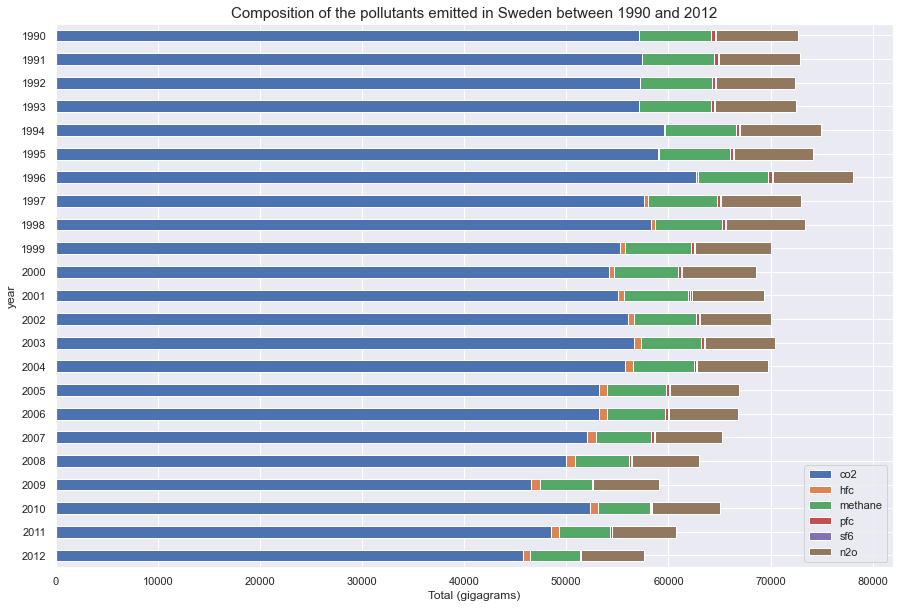

In [127]:
composition_emissions = emission_sweden.drop('total', axis=1)
composition_emissions.plot(kind='barh', x='year', stacked=True, figsize=(15,10))
plt.title('Composition of the pollutants emitted in Sweden between 1990 and 2012', fontsize=15)
plt.xlabel('Total (gigagrams)');

### C02 has always been the major component of the greenhouse gases released into the environment alongside Methane and N2O. 1996 was the year with the highest emission of greenhouse gases as a whole while 2012 was the year with the lowest emission in aggregate.

In [162]:
#years of lowest and highest emission for each greenhouse gas
def lowest_highest(column):
    '''a function to return the years with the lowest and highest emission respectively'''
    highest_emission = emission_sweden[column].max()
    lowest_emission = emission_sweden[column].min()
    highest_emission_year = (emission_sweden[emission_sweden[column] == highest_emission])[['year']].values
    lowest_emission_year = (emission_sweden[emission_sweden[column] == lowest_emission])[['year']].values
    return column.upper() + ' had its lowest and highest emission in {} and {} respectively.'.format(lowest_emission_year, highest_emission_year)

In [163]:
#calling functions to display the years of highest and lowest emissions respectively.
display(lowest_highest('co2'))

display(lowest_highest('hfc'))

display(lowest_highest('methane'))

display(lowest_highest('pfc'))

display(lowest_highest('sf6'))

display(lowest_highest('n2o'))

'CO2 had its lowest and highest emission in [[2012]] and [[1996]] respectively.'

'HFC had its lowest and highest emission in [[1990]] and [[2009]] respectively.'

'METHANE had its lowest and highest emission in [[2012]] and [[1992]] respectively.'

'PFC had its lowest and highest emission in [[2009]] and [[1991]] respectively.'

'SF6 had its lowest and highest emission in [[2012]] and [[1997]] respectively.'

'N2O had its lowest and highest emission in [[2012]] and [[1990]] respectively.'

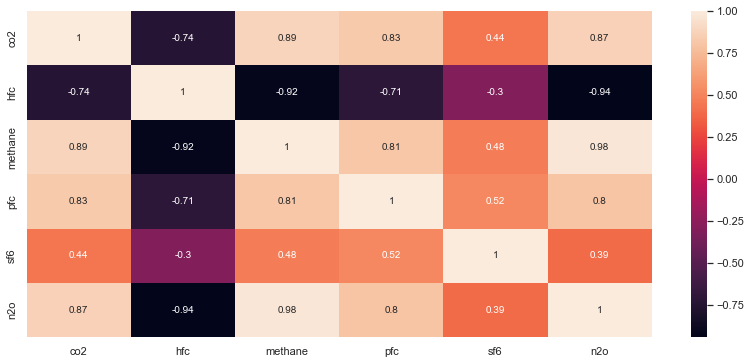

In [135]:
#displaying mathematical values of the correlation between the greenhouse gases with a heatmap
plt.figure(figsize=(14,6))
sns.heatmap(emission_sweden.drop(['year', 'total'], axis=1).corr(), annot=True);

### HFC seems to have a negative correlation value compared to other greenhouse gases.

## Conclusions

#### There has been a signficant drop in the emission of greenhouses gases in aggregate from 1990 to 2012 in Sweden which was 0.95%. Emission of greenhouse gases such as CO2, METHANE, PFC, SF6 and N2O have decreased by 0.91%, 1.54%, 5.33%, 2.25% and 1.16% respectively while HFC emission had increased by 6.62% during the stipulated period in this dataset. Although, correlation does not mean causation, there is a strong negative relationship between the emission of greenhouse gases(CO2, METHANE, PFC, SF6, N2O) to the emission of HFC. Hence, sources of the emission of CO2, METHANE, PFC, SF6 AND N2O could be the same or have confounding factors while the source of emission of HFC might be different.
#### CO2, METHANE and N20 are the major components of greenhouse gases emitted in Sweden.
#### 1996 was the year Sweden had the highest emission in greenhouse gases while 2012 was the year recorded with the lowest emission of greenhouse gases.